In [1]:
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
plt.rcParams.update({
    "text.usetex": True})

In [2]:
result_dir = os.path.join('..', '..', 'out', 'pokec_sensitivity_study')
num_experiments = 10
conditions = np.arange(0.1, 1.1, step=0.1)
data = []
for i in range(num_experiments):
    result_file = os.path.join(result_dir, str(i+1), 'result.npz')
    res = np.load(result_file)['result']
    for j in range(len(conditions)):
        data.append([1.1-round(conditions[j],2), (res[j] * 100)])
result_df = pd.DataFrame(data, columns=['Ratio of other preferences to random preference', 'MSE'])
result_df

,Ratio of other preferences to random preference,MSE
0,1.0,0.137624
1,0.9,0.054695
2,0.8,0.037440
3,0.7,0.025843
4,0.6,0.022286
...,...,...
95,0.5,0.032871
96,0.4,0.029447
97,0.3,0.022430
98,0.2,0.023287


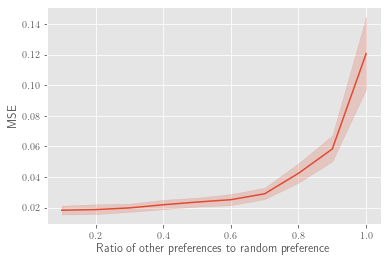

In [3]:
sns.lineplot(data=result_df, x='Ratio of other preferences to random preference', y='MSE')

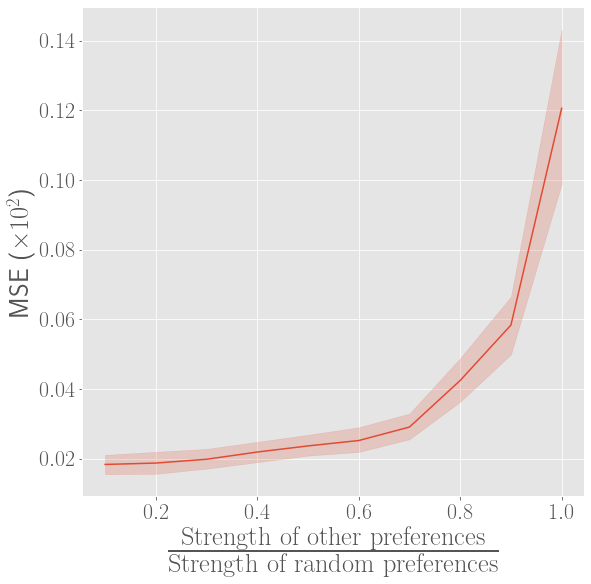

In [5]:
plt.figure(figsize=(9,9))
plt.rcParams.update({'font.size': 22})
plot = sns.lineplot(data=result_df, x='Ratio of other preferences to random preference', y='MSE')
plt.xlabel("$\\frac{\\textrm{Strength of other preferences}}{\\textrm{Strength of random preferences}}$")
plt.ylabel("MSE ($\\times 10^2$) ")
fig = plot.get_figure()
fig.savefig('../../out/sensitivity.pdf')